<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q3 Training Models (20 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**


First, be sure to run the script, from inside the scripts folder, `get_data.sh`. This will use `wget` and `unzip` to download 

http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip


http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip

and extract them to **data** and **image** folders


Since our input images are $32\times 32$ images, unrolled into one 1024 dimensional vector, that gets multiplied by $\textbf{W}^{(1)}$, each row of $\textbf{W}^{(1)}$ can be seen as a weight image. Reshaping each row into a $32\times 32$ image can give us an idea of what types of images each unit in the hidden layer has a high response to.

We have provided you three data **.mat** files to use for this section. The training data in **nist36\_train.mat** contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network. The cross-validation set in **nist36\_valid.mat** contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot over fitting. Finally, the test data in **nist36\_test.mat** contains testing data, and should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

### Q3.1 (8 points Autograder)
Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 30 epochs. **Modify** the script to generate two plots: one showing the accuracy on both the training and validation set over the epochs, and the other showing the cross-entropy loss averaged over the data. The x-axis should represent the epoch number, while the y-axis represents the accuracy or loss. With these settings, you should see an accuracy on the validation set of at least 75\%.

In [37]:
import random
import nbimporter
import numpy as np
import scipy.io
from q2 import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output

import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *

In [46]:

#load the dataset
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

#initial parameters
max_iters = 80
# pick a batch size, learning rate
#random.seed(200)
batch_size = 30
learning_rate = 2.55e-3
hidden_size = 64

In [47]:
#Get batches
batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)
valid_acc = None
params = {}

# size of weight is inputlayer size x output layer size  ::: x -- N X D and Y --- N x C
initialize_weights(train_x.shape[1],hidden_size,params,'layer1')
initialize_weights(hidden_size,train_y.shape[1],params,'output')
# initialize layers (named "layer1" and "output") here

#Initialization for the list for appending loss and accuracy
train_acclist =[]
valid_acclist= []
train_losslist =[]
valid_losslist= []

# with default settings, you should get loss < 150 and accuracy > 80%

for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    avg_acc =0
    #For Training the datasets
    for xb,yb in batches:
        
        #Forward Propagation
        post_act1 =forward(xb, params, 'layer1',sigmoid)
        post_act2 = forward(post_act1,params,'output',softmax)
        
        #Finding the loss and accuracy
        loss , accuracy = compute_loss_and_acc(yb, post_act2)
        
        #adding the loss and accuracy to epoch totals
        total_loss += loss 
        total_acc += accuracy

        
        delta1 =  post_act2 - yb
        #Finding delta 1

        # backward prop
        delta2 = backwards(delta1,params,'output',linear_deriv)
        grad_X = backwards(delta2,params,'layer1',sigmoid_deriv)
        
        #updating the parameters
        params['W' + 'output'] -= (learning_rate)*params['grad_W' + 'output']
        params['b' + 'output'] -= (learning_rate)*params['grad_b' + 'output']
        params['W' + 'layer1'] -= (learning_rate)*params['grad_W' + 'layer1']
        params['b' + 'layer1'] -= (learning_rate)*params['grad_b' + 'layer1']
    
    # Calculating avg accuracy and loss
    avg_acc = total_acc/batch_num
    total_loss = total_loss/batch_num
    if itr % 2 == 0:
        
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t avg_acc : {:.2f}".format(
            itr,total_loss,total_acc, avg_acc))
        
# run on validation set and report accuracy! should be above 75%

    #appending the accuracy and loss
    train_acclist.append(avg_acc)
    train_losslist.append(total_loss)
    
    #Performing Validation
    #Calculating the forward propagation for validation
    valid_post_act1 =forward(valid_x, params, 'layer1',sigmoid)
    valid_post_act2 = forward(valid_post_act1,params,'output',softmax)
    
    #Calculating the loss and accuracy for validation
    valid_loss , valid_acc= compute_loss_and_acc(valid_y, valid_post_act2)
    
    #Appending them into the list
    valid_acclist.append(valid_acc)
    valid_losslist.append(valid_loss)
    print("valid acc : {:.2f} \t ".format(valid_acc))

print('Validation accuracy: ',valid_acc)

itr: 00 	 loss: 99.98 	 acc : 55.47 	 avg_acc : 0.15
valid acc : 0.28 	 
valid acc : 0.45 	 
itr: 02 	 loss: 62.92 	 acc : 189.83 	 avg_acc : 0.53
valid acc : 0.54 	 
valid acc : 0.58 	 
itr: 04 	 loss: 45.92 	 acc : 226.70 	 avg_acc : 0.63
valid acc : 0.60 	 
valid acc : 0.62 	 
itr: 06 	 loss: 38.00 	 acc : 244.10 	 avg_acc : 0.68
valid acc : 0.64 	 
valid acc : 0.65 	 
itr: 08 	 loss: 33.40 	 acc : 255.07 	 avg_acc : 0.71
valid acc : 0.65 	 
valid acc : 0.66 	 
itr: 10 	 loss: 30.25 	 acc : 264.20 	 avg_acc : 0.73
valid acc : 0.67 	 
valid acc : 0.67 	 
itr: 12 	 loss: 27.86 	 acc : 271.77 	 avg_acc : 0.75
valid acc : 0.68 	 
valid acc : 0.68 	 
itr: 14 	 loss: 25.92 	 acc : 278.23 	 avg_acc : 0.77
valid acc : 0.69 	 
valid acc : 0.69 	 
itr: 16 	 loss: 24.28 	 acc : 283.80 	 avg_acc : 0.79
valid acc : 0.69 	 
valid acc : 0.69 	 
itr: 18 	 loss: 22.87 	 acc : 288.97 	 avg_acc : 0.80
valid acc : 0.70 	 
valid acc : 0.70 	 
itr: 20 	 loss: 21.61 	 acc : 293.03 	 avg_acc : 0.81
valid a

In [4]:
#Saving the parameters through pickle
import pickle
# Creating the dictionary
sav_params = {k:v for k,v in params.items() if '_' not in k}
#Saving the weights
with open('q3_weights.pickle', 'wb') as handle:
    pickle.dump(sav_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

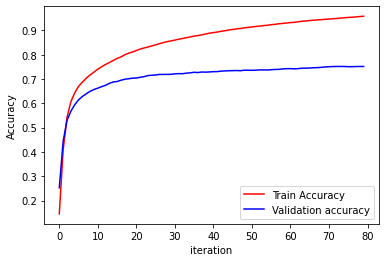

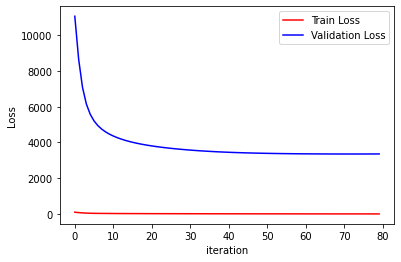

In [5]:
#Plotting the accuracy and loss for train and validation
a = np.arange(0, max_iters)
train_acclist =np.asarray(train_acclist)
valid_acclist= np.asarray(valid_acclist)
train_losslist =np.asarray(train_losslist)
valid_losslist= np.asarray(valid_losslist)

#print(train_acclist.shape, a.shape)

#For figure 1 - Accuracy
plt.figure(0)
plt.plot(a, train_acclist, 'r')
plt.plot(a, valid_acclist, 'b')
plt.legend(['Train Accuracy', 'Validation accuracy'])
plt.xlabel('iteration')
plt.ylabel('Accuracy')

#For figure 2 - Loss
plt.figure(1)
plt.plot(a, train_losslist, 'r')
plt.plot(a, valid_losslist, 'b')
plt.legend(['Train Loss', 'Validation Loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')

plt.show()

In [6]:
assert 'Wlayer1' in params
assert 'Woutput' in params


### Q3.2 (3 points Code+WriteUp)
Use your modified training script to train three networks, one with your best learning rate, one with 10 times that learning rate and one with one tenth that learning rate. Include all 6 plots in your writeup. Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [7]:
# Please put your code for Q3.2 here
# YOUR CODE HERE
def NN(learning_rate = None):
    max_iters = 70
    # pick a batch size, learning rate
    
    batch_size = 30
    hidden_size = 64
    
    #Get batches
    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)
    valid_acc = 0
    params = {}
    
    # size of weight is inputlayer size x output layer size  ::: x -- N X D and Y --- N x C
    initialize_weights(train_x.shape[1],hidden_size,params,'layer1')
    initialize_weights(hidden_size,train_y.shape[1],params,'output')
    # initialize layers (named "layer1" and "output") here

    #Initialization for the list for appending loss and accuracy
    train_acclist1 =[]
    valid_acclist1= []
    train_losslist1 =[]
    valid_losslist1= []
    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        avg_acc =0
        
        #For Training the datasets
        for xb,yb in batches:

            #Forward Propagation
            post_act1 =forward(xb, params, 'layer1',sigmoid)
            post_act2 = forward(post_act1,params,'output',softmax)
            
            #Finding the loss and accuracy
            loss , accuracy = compute_loss_and_acc(yb, post_act2)
          
            #adding the loss and accuracy to epoch totals
            total_loss += loss 
            total_acc += accuracy

      
            delta1 =  post_act2 - yb
            #Finding delta 1

            
            delta2 = backwards(delta1,params,'output',linear_deriv)
            grad_X = backwards(delta2,params,'layer1',sigmoid_deriv)
            # backward prop
            

            #Updating Parameters
            params['W' + 'output'] -= (learning_rate)*params['grad_W' + 'output']
            params['b' + 'output'] -= (learning_rate)*params['grad_b' + 'output']
            params['W' + 'layer1'] -= (learning_rate)*params['grad_W' + 'layer1']
            params['b' + 'layer1'] -= (learning_rate)*params['grad_b' + 'layer1']
        
        
        avg_acc = total_acc/batch_num
        total_loss = total_loss/batch_num
        
        if itr % 2 == 0:
    
            print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t avg_acc : {:.2f}".format(itr,total_loss,total_acc, avg_acc))

    # run on validation set and report accuracy! should be above 75%

        #appending the accuracy and loss
        train_acclist1.append(avg_acc)
        train_losslist1.append(total_loss)
        
        #Performing Validation
        #Calculating the forward propagation for validation
        valid_post_act1 =forward(valid_x, params, 'layer1',sigmoid)
        valid_post_act2 = forward(valid_post_act1,params,'output',softmax)
     
        valid_loss , valid_acc= compute_loss_and_acc(valid_y, valid_post_act2)
        valid_acclist1.append(valid_acc)
        valid_losslist1.append(valid_loss)
  

    #Plotting the accuracy and loss for train and validation
    a = np.arange(0, max_iters)
    train_acclist1 =np.asarray(train_acclist1)
    valid_acclist1= np.asarray(valid_acclist1)
    train_losslist1 =np.asarray(train_losslist1)
    valid_losslist1= np.asarray(valid_losslist1)
    print(train_acclist1.shape, a.shape)
    clear_output(wait=True)
    print('Validation accuracy: ',valid_acc)
    
    plt.figure(0)
    plt.plot(a, train_acclist1, 'r')
    plt.plot(a, valid_acclist1, 'b')
    plt.legend(['Train Accuracy', 'Validation accuracy'])
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')

    plt.figure(1)
    plt.plot(a, train_losslist1, 'r')
    plt.plot(a, valid_losslist1, 'b')
    plt.legend(['Train Loss', 'Validation Loss'])
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    
    plt.show()


# Training and Testing for different learning rate

Validation accuracy:  0.7408333333333333


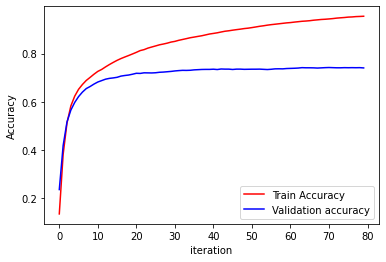

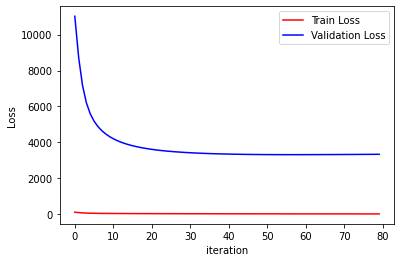

In [8]:
learning_rate = 2.55e-3
NN(learning_rate)


Validation accuracy:  0.625


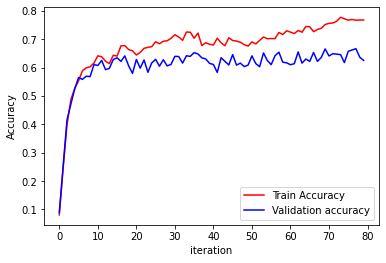

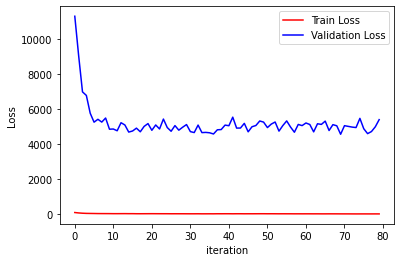

In [9]:
learning_rate = 2.55e-2
NN(learning_rate)

Validation accuracy:  0.6761111111111111


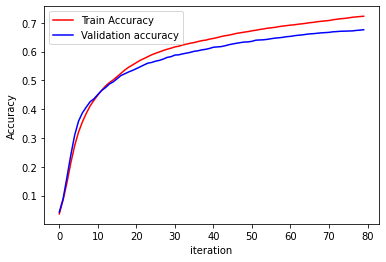

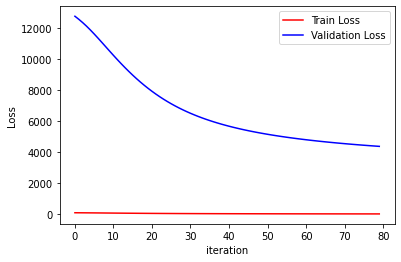

In [10]:
learning_rate = 2.55e-4
NN(learning_rate)

### Q3.3 (2 points Code+WriteUp)
Visualize the first layer weights that your network learned. Compare these to the network weights immediately after initialization. Include both visualizations in your writeup. Comment on the learned weights. Do you notice any patterns?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

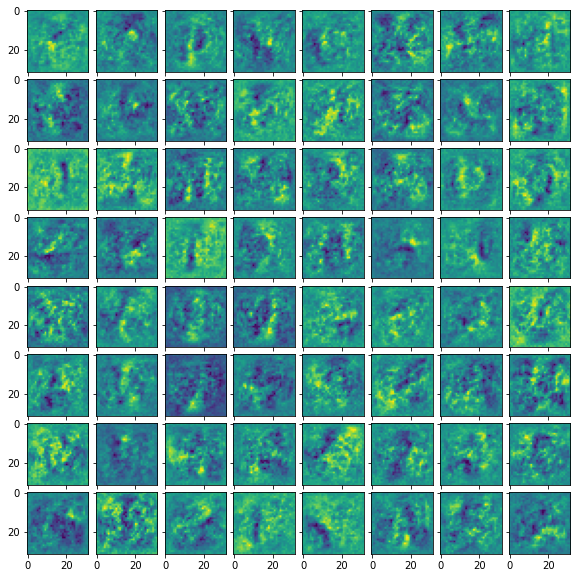

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

#As becomes a matrix Wx with output size 64 elements. Drawing it as a 8x8 image, since getting 1024, as invalid 
# reshaping equal dimentions
fig = plt.figure(figsize=(10, 10))

#Creating a grid for plotting the image
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


m = int(np.sqrt(params['Wlayer1'].shape[0]))
#print(m)
#Iterating through the number of images we need to print
for i in range(hidden_size): 
    grid[i].imshow(params['Wlayer1'][:,i].reshape((m,-1)))

plt.show()



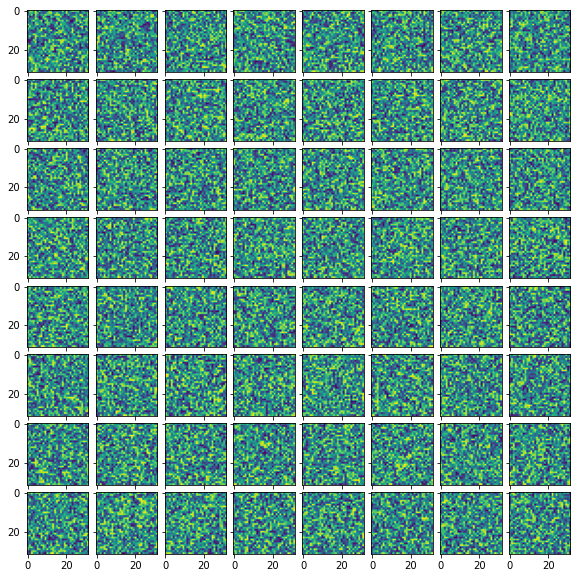

In [12]:
# Creating a new dictionary to avoid change in the original one 
paramscopy = {}

#initializing weights
initialize_weights(train_x.shape[1],hidden_size,paramscopy,'layer1')
initialize_weights(hidden_size,train_y.shape[1],paramscopy,'output')

fig = plt.figure(figsize=(10, 10))

grid = ImageGrid(fig, 111,  
                 nrows_ncols=(8, 8),  
                 axes_pad=0.1,  
                 )

# Spliting the dimension equally to reshape
m = int(np.sqrt(paramscopy['Wlayer1'].shape[0]))
#print(m)

for i in range(hidden_size): #Iterating through the number of images we need to print
    grid[i].imshow(paramscopy['Wlayer1'][:,i].reshape((m,-1)))

plt.show()

### Q3.4 (3 points Code+WriteUp)
To visualize the deeper second layer we use the following method:

Given $y_1$ (size 64) as the output of the first layer and $y_2$ (size 36) as the output of the second layer. We will take a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) for any number $i$ in range $[0, 36)$ and multiply it with the transposed weight matrix of layer 2, $W_2^T$. Similarly multiply the output with $W_1^T$ to get back an array of the size of the input image (1024). Reshape and visualize the result.

For these values of $i$, additionally include the image in the validation set for which $y_2(i)$ attains it's maximum value.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [13]:
#Creating a dictionary to avoid damaging the old one
paramscopy1 = {}
initialize_weights(train_x.shape[1],hidden_size,paramscopy1,'layer1')
initialize_weights(hidden_size,train_y.shape[1],paramscopy1,'output')
post_act1 =forward(train_x, paramscopy1, 'layer1',sigmoid)
post_act2 = forward(post_act1,paramscopy1,'output',softmax)

In [14]:
res =np.empty ((train_y.shape[1],params['Wlayer1'].shape[0]))
idx=[]
#Checking for one data each which corresponds to one of the 36 class. This is essentially a identity matriz (36) 
for j in range(train_y.shape[1]): # 36 class
    for i in range(train_y.shape[0]): #10800 Data
        if  train_y[i,j] == 1:
            idx.append(i)
            break

            # Performing the multiplication with the output
res = train_y[idx,:]@ (params['Woutput']).T @ (params['Wlayer1']).T
    

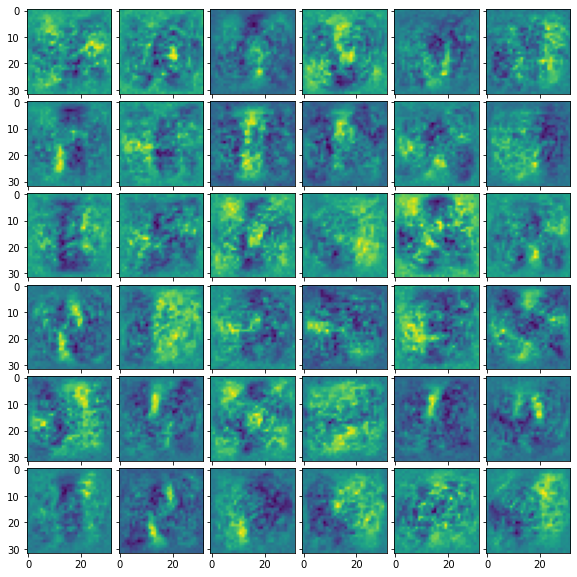

In [15]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(6, 6),  
                 axes_pad=0.1,  
                 )
m = int(np.sqrt(res.shape[1]))
#print(m)

for i in range(res.shape[0]): #Iterating through the number of images we need to print
    grid[i].imshow(res[i, :].reshape((m,-1)))

plt.show()

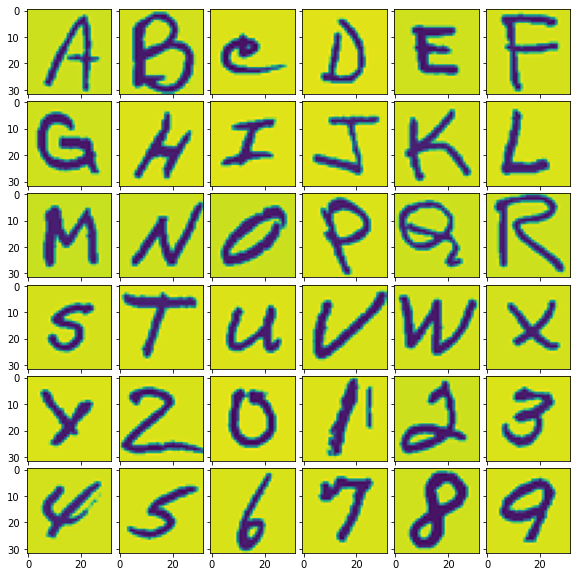

In [16]:
# Visualizing the The images in the test set
id=[]
for j in range(valid_y.shape[1]): # 36 class
    for i in range(valid_y.shape[0]): # no of datasets
        if  valid_y[i,j] == 1:
            id.append(i)
            break # Collecting the index only onces
#print(id)
#id - index of position of each individual classes(36) in test set collected onces
# Creating the test images with 36 classes
testim = valid_x[id,:]

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
m = int(np.sqrt(testim.shape[1]))
#print(m)
for i in range(testim.shape[0]): #Iterating through the number of images we need to print
    grid[i].imshow((testim[i, :].reshape((m,-1)).T))

plt.show()

### Q3.5 (4 points Code+WriteUp)
Visualize the confusion matrix for your best model for the test set. Comment on the top few pairs of classes that are most commonly confused.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

Validation accuracy:  0.7522222222222222


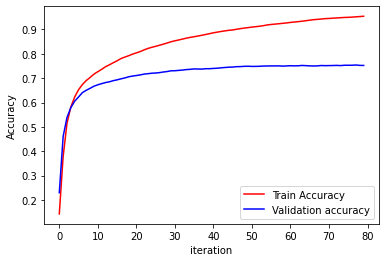

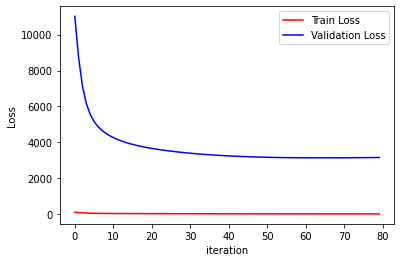

In [17]:
learning_rate = 2.5e-3
NN(learning_rate)
clear_output(wait=True)

In [29]:
#Finding th prediciton using train datset
post_act1_train =forward(train_x, params, 'layer1',sigmoid)
post_act2_train = forward(post_act1_train,params,'output',softmax)
loss , accuracy = compute_loss_and_acc(train_y, post_act2_train)
print(post_act2_train.shape); print(accuracy)

(10800, 36)
0.8675


In [19]:
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

In [28]:
#Finding the prediction usinf test dataset
post_act1_valid =forward(valid_x, params, 'layer1',sigmoid)
post_act2_valid = forward(post_act1_valid,params,'output',softmax)
loss , accuracy = compute_loss_and_acc(valid_y, post_act2_valid)
print(post_act2_valid.shape); print(accuracy)

(3600, 36)
0.7508333333333334


In [21]:
import matplotlib.pyplot as plt
confusion_matrix_train = np.zeros((train_y.shape[1],train_y.shape[1]))
confusion_matrix_valid = np.zeros((valid_y.shape[1],valid_y.shape[1]))

 #for train conf matrix
for i in range(train_y.shape[0]):
    #Calculating the max probable position of the class
    x_train = np.argmax(post_act2_train[i, :])  
    # Checking the position of 1 in hot vector
    y_train = np.where(train_y[i, :]==1)
    confusion_matrix_train[x_train, y_train] += 1
print(np.trace(confusion_matrix_train)/np.sum(confusion_matrix_train))
for i in range(valid_y.shape[0]):
    x_valid = np.argmax(post_act2_valid[i, :])  
    y_valid = np.where(valid_y[i, :]==1)
    confusion_matrix_valid[x_valid, y_valid] += 1



0.8624074074074074


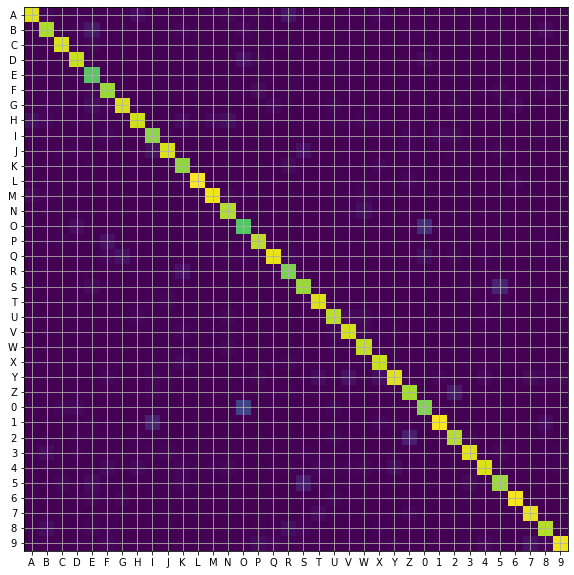

In [22]:
#Plotting the confusion matrix
import string
fig = plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_train,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()

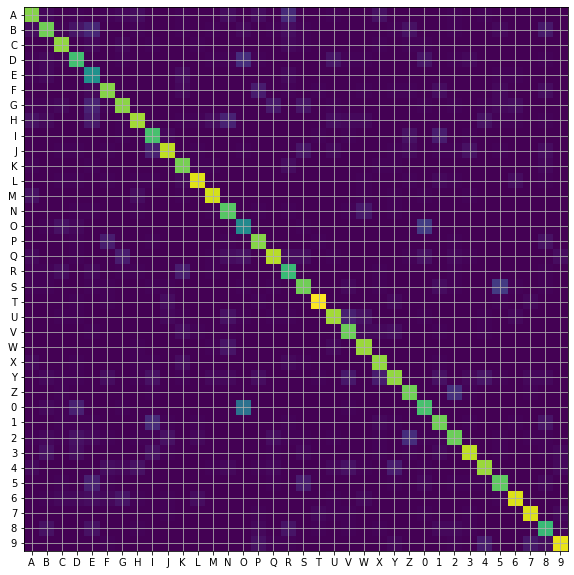

In [23]:
import string
fig = plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_valid,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()